In [1]:
#importing libraries

import pandas as pd
import numpy as np

In [2]:
#importing data

df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
#explore dataset
df_deaths.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/22/20  8/23/20  8/24/20  \
0        0        0        0        0  ...     1385     1387     1389   
1        0        0        0        0  ...      245      250      254   
2        0        0        0        0  ...     1424     1435     1446   
3        0        0        0        0  ...       53       53       53   
4        0        0        0        0  ...       94       96      100   

   8/25/20  8/26/20  8/27/20  8/28/20  8/29/20  8/30/20  8/31/20  
0     1397     1401     1401     1402     1402     1402     1402  
1      259      263      266      271      275      280      284  
2     1456     1465     1475     1483     1491     1501     1510  
3       53       53       53       53       53       53       53  
4      102      103      105      106      107      107      108  

[5 rows x 227 columns]

In [4]:
#data cleanup: lowercasing column headers

df_confirmed.columns=map(str.lower, df_confirmed.columns)
df_deaths.columns=map(str.lower, df_deaths.columns)
df_recovered.columns=map(str.lower, df_recovered.columns)

In [5]:
df_confirmed.head()

province/state country/region       lat       long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/22/20  8/23/20  8/24/20  \
0        0        0        0        0  ...    37953    37999    38054   
1        0        0        0        0  ...     8275     8427     8605   
2        0        0        0        0  ...    41068    41460    41858   
3        0        0        0        0  ...     1045     1045     1060   
4        0        0        0        0  ...     2134     2171     2222   

   8/25/20  8/26/20  8/27/20  8/28/20  8/29/20  8/30/20  8/31/20  
0    38070    38113    38129    38140    38143    38162    38165  
1     8759     8927     9083     9195     9279     9380     9513  
2    42228    42619    43016    43403    43781    44146    44494  
3     1060     1098     1098     1124     1124     1124     1176  
4     2283     2332     2415     2471     2551     2624     2654  

[5 rows x 227 columns]

In [6]:
# renaming columns
df_confirmed = df_confirmed.rename(columns = {'province/state':'state', 'country/region':'country'})
df_deaths = df_confirmed.rename(columns = {'province/state':'state', 'country/region':'country'})
df_recovered = df_confirmed.rename(columns = {'province/state':'state', 'country/region':'country'})

In [7]:
df_confirmed.columns

Index(['state', 'country', 'lat', 'long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/22/20', '8/23/20', '8/24/20', '8/25/20', '8/26/20', '8/27/20',
       '8/28/20', '8/29/20', '8/30/20', '8/31/20'],
      dtype='object', length=227)

In [8]:
# date columns of the 3 different datasets are equal, so let's merge them
df_deaths.columns

Index(['state', 'country', 'lat', 'long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/22/20', '8/23/20', '8/24/20', '8/25/20', '8/26/20', '8/27/20',
       '8/28/20', '8/29/20', '8/30/20', '8/31/20'],
      dtype='object', length=227)

In [9]:
dates = df_confirmed.columns[4:]

In [10]:
#using .melt to merge the date columns into a single column for confirmed, deaths and recovered respectively:

df_confirmed_long = df_confirmed.melt(
    id_vars=['state', 'country', 'lat', 'long'], 
    value_vars=dates, 
    var_name='date', 
    value_name='confirmed'
)

df_deaths_long = df_deaths.melt(
    id_vars=['state', 'country', 'lat', 'long'], 
    value_vars=dates, 
    var_name='date', 
    value_name='deaths'
)

df_recovered_long = df_recovered.melt(
    id_vars=['state', 'country', 'lat', 'long'], 
    value_vars=dates, 
    var_name='date', 
    value_name='recovered'
)

In [11]:
df_deaths_long.head()

state      country       lat       long     date  deaths
0   NaN  Afghanistan  33.93911  67.709953  1/22/20       0
1   NaN      Albania  41.15330  20.168300  1/22/20       0
2   NaN      Algeria  28.03390   1.659600  1/22/20       0
3   NaN      Andorra  42.50630   1.521800  1/22/20       0
4   NaN       Angola -11.20270  17.873900  1/22/20       0

In [12]:
#merging the 3 datasets into one full table
full_table = df_confirmed_long.merge(
  right=df_deaths_long, 
  how='left',
  on=['state', 'country', 'date', 'lat', 'long']
)

In [13]:
#merging the 3 datasets into one full table
full_table = full_table.merge(
  right=df_recovered_long, 
  how='left',
  on=['state', 'country', 'date', 'lat', 'long']
)

In [14]:
full_table.head()

state      country       lat       long     date  confirmed  deaths  \
0   NaN  Afghanistan  33.93911  67.709953  1/22/20          0       0   
1   NaN      Albania  41.15330  20.168300  1/22/20          0       0   
2   NaN      Algeria  28.03390   1.659600  1/22/20          0       0   
3   NaN      Andorra  42.50630   1.521800  1/22/20          0       0   
4   NaN       Angola -11.20270  17.873900  1/22/20          0       0   

   recovered  
0          0  
1          0  
2          0  
3          0  
4          0

In [15]:
#converting date to datetime format and removing NaNs from recovered and making them 0s
full_table['recovered'] = full_table['recovered'].fillna(0)
full_table['date'] = pd.to_datetime(full_table['date'])

In [16]:
full_table['active']= full_table['confirmed']- full_table['recovered']-full_table['deaths']

In [17]:
full_table.head()

state      country       lat       long       date  confirmed  deaths  \
0   NaN  Afghanistan  33.93911  67.709953 2020-01-22          0       0   
1   NaN      Albania  41.15330  20.168300 2020-01-22          0       0   
2   NaN      Algeria  28.03390   1.659600 2020-01-22          0       0   
3   NaN      Andorra  42.50630   1.521800 2020-01-22          0       0   
4   NaN       Angola -11.20270  17.873900 2020-01-22          0       0   

   recovered  active  
0          0       0  
1          0       0  
2          0       0  
3          0       0  
4          0       0

In [18]:
#grouping by date and country
final_covid_table= full_table.groupby(['date','country'])['confirmed','deaths','recovered', 'active'].sum().reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [19]:
final_covid_table.head()

date      country  confirmed  deaths  recovered  active
0 2020-01-22  Afghanistan          0       0          0       0
1 2020-01-22      Albania          0       0          0       0
2 2020-01-22      Algeria          0       0          0       0
3 2020-01-22      Andorra          0       0          0       0
4 2020-01-22       Angola          0       0          0       0

In [20]:
#sorting the full table according to descending order of confirmed cases
sorted_covid_table = final_covid_table.sort_values('confirmed', ascending=False).head()

In [21]:
sorted_covid_table

date country  confirmed   deaths  recovered   active
41910 2020-08-31      US    6030587  6030587    6030587 -6030587
41722 2020-08-30      US    5996431  5996431    5996431 -5996431
41534 2020-08-29      US    5961094  5961094    5961094 -5961094
41346 2020-08-28      US    5913941  5913941    5913941 -5913941
41158 2020-08-27      US    5867785  5867785    5867785 -5867785

In [22]:
import plotly.express as px

In [ ]:
fig = px.scatter(final_covid_table.head(10), x='country', y='deaths', hover_name='country')
fig.show()

In [24]:
final_covid_table.head(100)

date      country  confirmed  deaths  recovered  active
0  2020-01-22  Afghanistan          0       0          0       0
1  2020-01-22      Albania          0       0          0       0
2  2020-01-22      Algeria          0       0          0       0
3  2020-01-22      Andorra          0       0          0       0
4  2020-01-22       Angola          0       0          0       0
..        ...          ...        ...     ...        ...     ...
95 2020-01-22         Laos          0       0          0       0
96 2020-01-22       Latvia          0       0          0       0
97 2020-01-22      Lebanon          0       0          0       0
98 2020-01-22      Lesotho          0       0          0       0
99 2020-01-22      Liberia          0       0          0       0

[100 rows x 6 columns]

In [25]:
#exporting final table
final_covid_table.to_csv('final_covid_table.csv')

In [58]:
import matplotlib.pyplot as plot 

In [ ]:
plot.show()

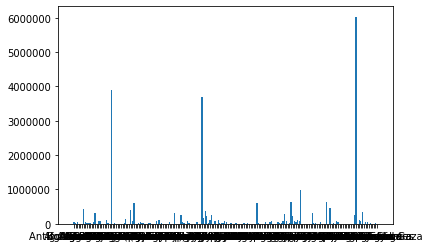

In [60]:
plot.bar(x=final_covid_table['country'], height= final_covid_table['confirmed'])
plot.show()

In [31]:
sorted_covid_table.head()

date country  confirmed   deaths  recovered   active
41910 2020-08-31      US    6030587  6030587    6030587 -6030587
41722 2020-08-30      US    5996431  5996431    5996431 -5996431
41534 2020-08-29      US    5961094  5961094    5961094 -5961094
41346 2020-08-28      US    5913941  5913941    5913941 -5913941
41158 2020-08-27      US    5867785  5867785    5867785 -5867785

In [32]:
final_covid_table.head()

date      country  confirmed  deaths  recovered  active
0 2020-01-22  Afghanistan          0       0          0       0
1 2020-01-22      Albania          0       0          0       0
2 2020-01-22      Algeria          0       0          0       0
3 2020-01-22      Andorra          0       0          0       0
4 2020-01-22       Angola          0       0          0       0

In [33]:
final_covid_table.tail(10)

date             country  confirmed  deaths  recovered  active
41914 2020-08-31      United Kingdom     338083  338083     338083 -338083
41915 2020-08-31             Uruguay       1595    1595       1595   -1595
41916 2020-08-31          Uzbekistan      41893   41893      41893  -41893
41917 2020-08-31           Venezuela      46728   46728      46728  -46728
41918 2020-08-31             Vietnam       1044    1044       1044   -1044
41919 2020-08-31  West Bank and Gaza      22729   22729      22729  -22729
41920 2020-08-31      Western Sahara         10      10         10     -10
41921 2020-08-31               Yemen       1958    1958       1958   -1958
41922 2020-08-31              Zambia      12097   12097      12097  -12097
41923 2020-08-31            Zimbabwe       6497    6497       6497   -6497

In [61]:
final_covid_table.plot(x= final_covid_table['country'], y= final_covid_table['confirmed'], kind= 'bar')

KeyError: "None of [Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',\n       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',\n       ...\n       'United Kingdom', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam',\n       'West Bank and Gaza', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],\n      dtype='object', length=41924)] are in the [columns]"

In [36]:
final_covid_table.to_csv(r'C:\python\final_covid_table.csv')

In [37]:
import matplotlib.pyplot as plt


In [40]:
plt.bar(x=final_covid_table['country'], height= final_covid_table['confirmed'])

TypeError: 'method' object is not subscriptable

In [39]:
plt.show()

In [41]:
covid_table_100 = final_covid_table.head(100)

<BarContainer object of 100 artists>

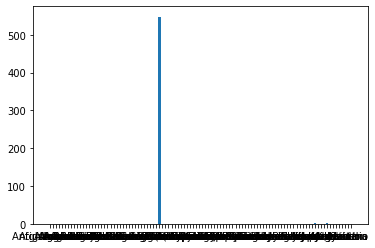

In [42]:
plt.bar(x=covid_table_100['country'], height= covid_table_100['confirmed'])

In [43]:
#making smaller table for plotting purposes
tail_table =final_covid_table.tail(10)

<BarContainer object of 10 artists>

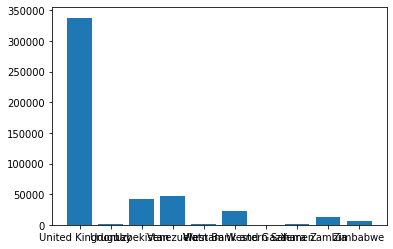

In [44]:
plt.bar(x=tail_table['country'], height= tail_table['confirmed'])

In [45]:
import plotly.express as px

In [48]:

#deaths plotted
fig = px.bar(tail_table, x="country", y="deaths", title="World Deaths", barmode='group',height=600)

In [49]:
fig.show()

In [50]:

#confirmed cases plotted
fig = px.bar(tail_table, x="country", y="confirmed", title="World Confirmed Cases", barmode='group',height=600)

In [51]:
fig.show()

In [52]:
#recovered plotted
fig = px.bar(tail_table, x="country", y="recovered", title="World Recovered", barmode='group',height=600)

In [53]:
fig.show()

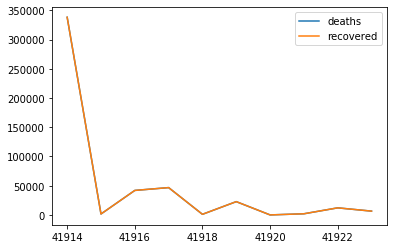

In [56]:
tail_table[['deaths', 'recovered']].plot()

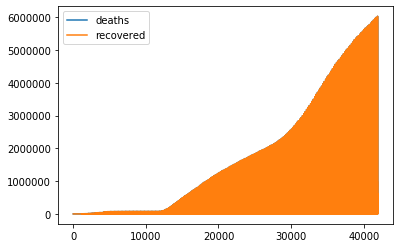

In [57]:
#plotting deaths vs recovered
final_covid_table[['deaths', 'recovered']].plot()